In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
chemin_image = "../output_videos/image_rognee_1.jpg"
image = cv2.imread(chemin_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

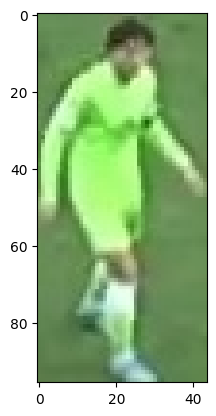

In [3]:
plt.imshow(image)
plt.show()

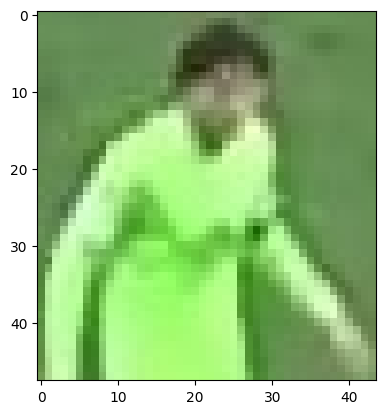

In [4]:
# Prendre moitié supérieure
moitie_haut = image[0: int(image.shape[0]/2), :]
plt.imshow(moitie_haut)
plt.show()

Faire deux groupes

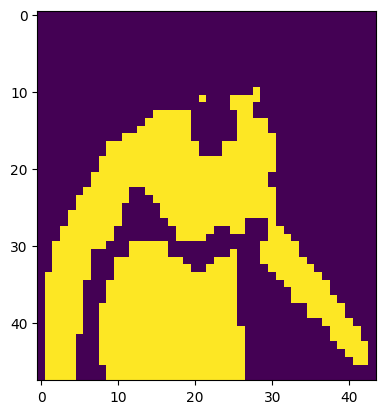

In [7]:
 # Image -> tableau 2d
image_2d = moitie_haut.reshape(-1,3)

# Groupage k-means
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# get les labels des groupes
labels = kmeans.labels_

# Reformer pour correspondre à l'image de base
images_groupees = labels.reshape(moitie_haut.shape[0], moitie_haut.shape[1])

# Montrer l'image
plt.imshow(images_groupees)
plt.show()


In [8]:
groupe_coins = [images_groupees[0,0], images_groupees[0,-1], images_groupees[-1,0], images_groupees[-1,-1]]
groupe_nonjoueurs = max(set(groupe_coins), key=groupe_coins.count)
print(groupe_nonjoueurs)

0


In [10]:
groupe_joueurs = 1-groupe_nonjoueurs
print(groupe_joueurs)

1


In [11]:
kmeans.cluster_centers_[groupe_joueurs]


array([175.63932292, 242.74479167, 139.74088542])